In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
N = 100
x = np.linspace(-2, 2, N)
eps = np.random.uniform(-1, 1, N)

In [4]:
def f(x):
    return -x**5 + 1.5*x**3 -2*x**2 + 4*x + 3

In [5]:
Y = f(x) + eps

In [20]:
bias = np.ones(N)
X = np.vstack((bias, x, x**2, x**3, x**4, x**5)).T

In [21]:
X

array([[ 1.00000000e+00, -2.00000000e+00,  4.00000000e+00,
        -8.00000000e+00,  1.60000000e+01, -3.20000000e+01],
       [ 1.00000000e+00, -1.95959596e+00,  3.84001632e+00,
        -7.52488047e+00,  1.47457254e+01, -2.88956639e+01],
       [ 1.00000000e+00, -1.91919192e+00,  3.68329762e+00,
        -7.06895503e+00,  1.35666814e+01, -2.60370653e+01],
       [ 1.00000000e+00, -1.87878788e+00,  3.52984389e+00,
        -6.63182792e+00,  1.24597979e+01, -2.34093173e+01],
       [ 1.00000000e+00, -1.83838384e+00,  3.37965514e+00,
        -6.21310338e+00,  1.14220688e+01, -2.09981468e+01],
       [ 1.00000000e+00, -1.79797980e+00,  3.23273135e+00,
        -5.81238567e+00,  1.04505520e+01, -1.87898814e+01],
       [ 1.00000000e+00, -1.75757576e+00,  3.08907254e+00,
        -5.42927902e+00,  9.54236918e+00, -1.67714367e+01],
       [ 1.00000000e+00, -1.71717172e+00,  2.94867871e+00,
        -5.06338768e+00,  8.69470611e+00, -1.49303034e+01],
       [ 1.00000000e+00, -1.67676768e+00,  2.811

8278211555345.291

In [23]:
theta_head = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),Y)
theta_head

array([ 3.01197995,  3.80436153, -1.94505007,  1.7185644 , -0.02173195,
       -1.04485242])

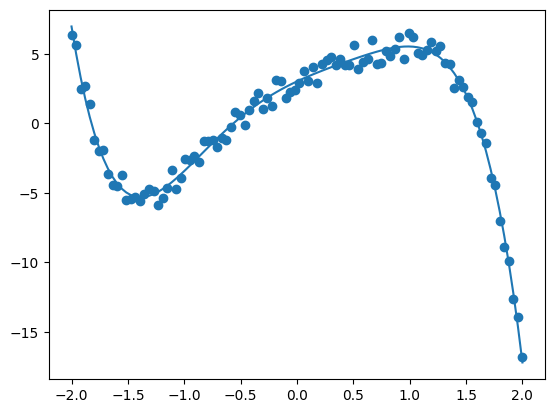

In [24]:
plt.scatter(x, Y)
t = theta_head
y_estimate = [(t[0]+t[1]*x + t[2]*x**2 + t[3]*x**3+t[4]*x**4+t[5]*x**5) for x in x]
plt.plot(x, y_estimate)

In [26]:
l2_norm = np.sqrt(np.sum((Y-y_estimate)**2))
l2_norm

5.772299526441085

In [75]:
losses = []
ranging = 100
for n in range(ranging):
    N = n
    x = np.linspace(-2, 2, N)
    eps = np.random.uniform(-1, 1, N)
    Y = f(x) + eps
    bias = np.ones(N)
    X = np.vstack((bias, x, x**2, x**3, x**4, x**5)).T
    theta_head = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)),X.T),Y)
    t = theta_head
    y_estimate = [(t[0]+t[1]*x + t[2]*x**2 + t[3]*x**3+t[4]*x**4+t[5]*x**5) for x in x]
    true_params = [3, 4, -2, 1.5, 0, -1]
    losses.append(np.linalg.norm(t-true_params, 2))


In [80]:
l_x = np.linspace(1, ranging, ranging)
print(len(l_x))

100


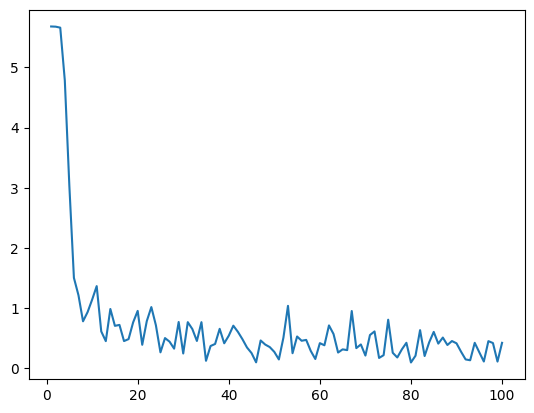

In [82]:
plt.plot(l_x, losses)